# Actividad 3: Patrones con K-means

In [4]:
#   __  __                   _                   _           
#  |  \/  |                 | |                 (_)          
#  | \  / | __ _  __ _  ___ | |_ _ __ ___  _ __  _  ___ ___  
#  | |\/| |/ _` |/ _` |/ _ \| __| '__/ _ \| '_ \| |/ __/ _ \ 
#  | |  | | (_| | (_| | (_) | |_| | | (_) | | | | | (_| (_) |
#  |_|  |_|\__,_|\__, |\___/ \__|_|  \___/|_| |_|_|\___\___/ 
#                 __/ |                                      
#                |___/                                       
# ─────────────────────────────────────────────────────────────────────────────
#                                                                           
# Script Name : k_means_patterns.ipynb
# Author      : Dilan Castañeda                                             
# Created On  : October 06, 2024                                           
# Last Update : October 06, 2024                                         
# Version     : 1.0.0                                          
# Description : Actividad 3: Patrones con K-means. Based on a dropout dataset we need to find the best k value for the k-means algorithm.
# ─────────────────────────────────────────────────────────────────────────────

## Carga tus datos.


In [5]:
# Load libraries
!pip install kneed
!pip install gdown
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelBinarizer, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gdown
from tabulate import tabulate

In [6]:
# Load dataset
file_id = "1CCA6EzTc2qh3lqucoEw0MR4NjjLNQGvk"
output = "Dropout_dataset_Case_study.csv"

# Download the file from Google Drive
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1CCA6EzTc2qh3lqucoEw0MR4NjjLNQGvk
To: c:\Users\dilan\Documents\Github\DataAnalysis_and_AI\period_2\machine_learning\Dropout_dataset_Case_study.csv
100%|██████████| 2.01M/2.01M [00:00<00:00, 4.91MB/s]


'Dropout_dataset_Case_study.csv'

In [7]:
# Read the CSV file using pandas
data = pd.read_csv(output)

# Check the number of records and columns
print("Number of records:", data.shape[0])
print("Number of columns:", data.shape[1])

# Print the first few rows of the dataframe
data.head()

Number of records: 5000
Number of columns: 50


,student.id,generation,educational.model,level,gender,age,max.degree.parents,father.education.complete,father.education.summary,mother.education.complete,...,dropout.semester,physical.education,cultural.diffusion,student.society,total.life.activities,athletic.sports,art.culture,student.society.leadership,life.work.mentoring,wellness.activities
0,35260,AD16,0,Undergraduate,Female,19,No information,No information,No information,No information,...,0,1,1,0,Does not apply,Does not apply,Does not apply,Does not apply,Does not apply,Does not apply
1,49405,AD18,0,Undergraduate,Female,18,PhD,Received PhD,PhD,Received master degree,...,0,Does not apply,Does not apply,Does not apply,2,1,1,0,0,0
2,106944,AD18,0,High School,Female,15,Undergraduate degree,Received undergraduate degree,Undergraduate degree,Graduated from elementary or middle school,...,0,Does not apply,Does not apply,Does not apply,2,0,1,1,0,0
3,107183,AD19,1,High School,Male,16,Undergraduate degree,"Attended university, but did not graduate",No degree,Received undergraduate degree,...,0,Does not apply,Does not apply,Does not apply,2,1,0,1,0,0
4,92225,AD18,0,Undergraduate,Male,19,Undergraduate degree,Received undergraduate degree,Undergraduate degree,Received undergraduate degree,...,4,Does not apply,Does not apply,Does not apply,2,1,0,0,1,0


## Filtra y pre-procesa tus datos de acuerdo a lo visto en clase.


In [8]:
# Gender column
print("Unique values ​​of the variable 'Gender':\n", data['gender'].unique())

Unique values ​​of the variable 'Gender':
 ['Female' 'Male' 'M' 'F' 'MALE' 'FEMALE']


In [9]:
# Homologate the values
data['gender'] = data['gender'].replace({'M': 'Male', 'F': 'Female', 'MALE': 'Male', 'FEMALE':'Female'})

# Label Binarizer
lb = LabelBinarizer()
data['gender'] = lb.fit_transform(data['gender'])

# Print labels and which is which
print("Unique values ​​of the variable 'Gender':\n", data['gender'].unique())
print("Labels:\n", f'{lb.classes_[0]}: {lb.inverse_transform(np.array([0]))[0]}')
print("Labels:\n", f'{lb.classes_[1]}: {lb.inverse_transform(np.array([1]))[0]}')


Unique values ​​of the variable 'Gender':
 [0 1]
Labels:
 Female: Female
Labels:
 Male: Male


In [10]:
# TEC.NO.TEC column
print("Unique values ​​of the variable 'Tec.No.Tec':\n", data['tec.no.tec'].unique())

Unique values ​​of the variable 'Tec.No.Tec':
 ['TEC' 'NO TEC' '999']


In [11]:
# pct of 999 in column
data['tec.no.tec'].value_counts() / len(data['tec.no.tec']) * 100
# Delete non-text records
data = data[(data['tec.no.tec'] == 'TEC') | (data['tec.no.tec'] == 'NO TEC')]

# Count records that have any value in 'TEC.NO.TEC' after removing non-text ones
print("Number of records after removing non-text ones:", data.shape[0])

Number of records after removing non-text ones: 4915


In [12]:
# Reasonable range for age
minimum_age = 14
maximum_age = 24
# Filter the DataFrame
data = data[(data['age'] >= minimum_age) & (data['age'] <= maximum_age)]
print("Number of records after removing outliers:", data.shape[0])

Number of records after removing outliers: 4838


In [13]:
# Change No information for np.nan in all columns
data = data.replace("No information", np.nan)

# Change 'Does not apply' for

Corrección de columnas de papás y mamás

In [14]:
# conteo de cada valor
conteoPaComp = data['father.education.complete'].value_counts(dropna=False)
conteoPaSumm = data['father.education.summary'].value_counts(dropna=False)
conteoMaComp = data['mother.education.complete'].value_counts(dropna=False)
conteoMaSumm = data['mother.education.summary'].value_counts(dropna=False)

# calcular porcentaje
porcentajePaComp = conteoPaComp / len(data['father.education.complete']) * 100
porcentajePaSumm = conteoPaSumm / len(data['father.education.summary']) * 100
porcentajeMaComp = conteoMaComp / len(data['mother.education.complete']) * 100
porcentajeMaSumm = conteoMaSumm / len(data['mother.education.summary']) * 100

print(porcentajePaComp)
print(porcentajePaSumm)
print(porcentajeMaComp)
print(porcentajeMaSumm)

# tomar estas columnas como las último recurso
# o eliminar ese 34% y 35% de información

father.education.complete
Received undergraduate degree                 34.828442
NaN                                           34.105002
Received master degree                        16.287722
Graduated from high school                     4.175279
Attended university, but did not graduate      3.989252
Received PhD                                   2.625052
Graduated from elementary or middle school     2.397685
Received technical or commercial degree        1.405539
None educational degree                        0.186027
Name: count, dtype: float64
father.education.summary
Undergraduate degree    34.828442
NaN                     34.105002
Master degree           16.287722
No degree               12.153783
PhD                      2.625052
Name: count, dtype: float64
mother.education.complete
Received undergraduate degree                 37.040099
NaN                                           35.035138
Received master degree                         9.198016
Graduated from high schoo

Corrección de columnas de papás y mamás EXATEC

In [15]:
# conteo de cada valor
conteoPaComp = data['father.education.complete'].value_counts(dropna=False)
conteoPaSumm = data['father.education.summary'].value_counts(dropna=False)
conteoMaComp = data['mother.education.complete'].value_counts(dropna=False)
conteoMaSumm = data['mother.education.summary'].value_counts(dropna=False)

# calcular porcentaje
porcentajePaComp = conteoPaComp / len(data['father.education.complete']) * 100
porcentajePaSumm = conteoPaSumm / len(data['father.education.summary']) * 100
porcentajeMaComp = conteoMaComp / len(data['mother.education.complete']) * 100
porcentajeMaSumm = conteoMaSumm / len(data['mother.education.summary']) * 100

print(porcentajePaComp)
print(porcentajePaSumm)
print(porcentajeMaComp)
print(porcentajeMaSumm)

# tomar estas columnas como las último recurso
# o eliminar ese 34% y 35% de información

father.education.complete
Received undergraduate degree                 34.828442
NaN                                           34.105002
Received master degree                        16.287722
Graduated from high school                     4.175279
Attended university, but did not graduate      3.989252
Received PhD                                   2.625052
Graduated from elementary or middle school     2.397685
Received technical or commercial degree        1.405539
None educational degree                        0.186027
Name: count, dtype: float64
father.education.summary
Undergraduate degree    34.828442
NaN                     34.105002
Master degree           16.287722
No degree               12.153783
PhD                      2.625052
Name: count, dtype: float64
mother.education.complete
Received undergraduate degree                 37.040099
NaN                                           35.035138
Received master degree                         9.198016
Graduated from high schoo

In [16]:
# Create an empty dictionary to store the results
nan_percentages = {}

# Iterate over each column in the DataFrame
for column in data.columns:
  # Calculate the percentage of NaN values
  nan_percentage = (data[column].isnull().sum() / len(data[column])) * 100
  # Store the result in the dictionary
  nan_percentages[column] = nan_percentage

# Convert the dictionary to a DataFrame for better display
nan_df = pd.DataFrame(nan_percentages.items(), columns=['Column', 'NaN Percentage'])

# Display the DataFrame as a table
print(tabulate(nan_df, headers='keys', tablefmt='psql'))

+----+------------------------------+------------------+
|    | Column                       |   NaN Percentage |
|----+------------------------------+------------------|
|  0 | student.id                   |         0        |
|  1 | generation                   |         0        |
|  2 | educational.model            |         0        |
|  3 | level                        |         0        |
|  4 | gender                       |         0        |
|  5 | age                          |         0        |
|  6 | max.degree.parents           |        31.914    |
|  7 | father.education.complete    |        34.105    |
|  8 | father.education.summary     |        34.105    |
|  9 | mother.education.complete    |        35.0351   |
| 10 | mother.education.summary     |        35.0351   |
| 11 | parents.exatec               |        17.7966   |
| 12 | father.exatec                |        18.7474   |
| 13 | mother.exatec                |        18.6234   |
| 14 | tec.no.tec              

In [17]:
# DataFrame con porcentajes de NaN en 0%
zero_nan_df = nan_df[nan_df['NaN Percentage'] == 0]

# DataFrame con porcentajes de NaN mayores a 0%
non_zero_nan_df = nan_df[nan_df['NaN Percentage'] > 0]

In [18]:
zero_nan_df.reset_index(drop=True, inplace=True)
zero_nan_df

,Column,NaN Percentage
0,student.id,0.0
1,generation,0.0
2,educational.model,0.0
3,level,0.0
4,gender,0.0
5,age,0.0
6,tec.no.tec,0.0
7,foreign,0.0
8,school,0.0
9,program,0.0


In [19]:
non_zero_nan_df.reset_index(drop=True, inplace=True)
non_zero_nan_df = non_zero_nan_df.sort_values(by='NaN Percentage')
non_zero_nan_df

,Column,NaN Percentage
26,wellness.activities,0.144688
24,student.society.leadership,0.144688
23,art.culture,0.144688
22,athletic.sports,0.144688
21,total.life.activities,0.144688
25,life.work.mentoring,0.144688
20,student.society,0.682100
19,cultural.diffusion,0.682100
18,physical.education,0.682100
10,admission.test,1.302191


In [20]:
# List of unique values per column
temp_df = pd.DataFrame(columns=['Column', 'dtype', 'Unique Values', 'amnt_unique','nan', 'size'])

for column in data.columns:
    unique_values = [data[column].unique()]  # Ensure unique values are in a list
    amnt_unique = data[column].nunique()
    temp_df = pd.concat([temp_df, pd.DataFrame({'Column': [column], 'dtype': [data[column].dtype], 'Unique Values': unique_values, 'amnt_unique': amnt_unique})], ignore_index=True)
    temp_df.loc[temp_df['Column'] == column, 'nan'] = data[column].isnull().sum()
    temp_df.loc[temp_df['Column'] == column, 'size'] = data[column].count()

# Display the resulting dataframe
temp_df

,Column,dtype,Unique Values,amnt_unique,nan,size
0,student.id,int64,"[35260, 49405, 106944, 107183, 92225, 118754, ...",4805,0,4838
1,generation,object,"[AD16, AD18, AD19, AD20, AD15, AD14, AD17]",7,0,4838
2,educational.model,int64,"[0, 1]",2,0,4838
3,level,object,"[Undergraduate, High School]",2,0,4838
4,gender,int32,"[0, 1]",2,0,4838
5,age,int64,"[19, 18, 15, 16, 22, 14, 17, 20, 23, 21, 24]",11,0,4838
6,max.degree.parents,object,"[nan, PhD, Undergraduate degree, Master degree...",4,1544,3294
7,father.education.complete,object,"[nan, Received PhD, Received undergraduate deg...",8,1650,3188
8,father.education.summary,object,"[nan, PhD, Undergraduate degree, No degree, Ma...",4,1650,3188
9,mother.education.complete,object,"[nan, Received master degree, Graduated from e...",8,1695,3143


In [21]:
# Crear el DataFrame temporal
temp_df = pd.DataFrame(columns=['Column', 'dtype', 'Unique Values', 'amnt_unique', 'nan', 'size'])

# Lista de las columnas
columns_to_analyze = [
    'generation', 'educational.model', 'level', 'gender', 'age', 'tec.no.tec',
    'foreign', 'school', 'program', 'region', 'PNA', 'online.test', 'english.evaluation',
    'FTE', 'scholarship.perc', 'scholarship.type', 'loan.perc', 'total.scholarship.loan',
    'school.cost', 'id.school.origin', 'dropout.semester'
]

# Filtrar solo las columnas deseadas
for column in columns_to_analyze:
    unique_values = [data[column].unique()]
    amnt_unique = data[column].nunique()

    # Añadir la información al DataFrame temporal
    temp_df = pd.concat([temp_df, pd.DataFrame({'Column': [column], 'dtype': [data[column].dtype], 'Unique Values': unique_values, 'amnt_unique': amnt_unique})], ignore_index=True)
    temp_df.loc[temp_df['Column'] == column, 'nan'] = data[column].isnull().sum()
    temp_df.loc[temp_df['Column'] == column, 'size'] = data[column].count()

temp_df

,Column,dtype,Unique Values,amnt_unique,nan,size
0,generation,object,"[AD16, AD18, AD19, AD20, AD15, AD14, AD17]",7,0,4838
1,educational.model,int64,"[0, 1]",2,0,4838
2,level,object,"[Undergraduate, High School]",2,0,4838
3,gender,int32,"[0, 1]",2,0,4838
4,age,int64,"[19, 18, 15, 16, 22, 14, 17, 20, 23, 21, 24]",11,0,4838
5,tec.no.tec,object,"[TEC, NO TEC]",2,0,4838
6,foreign,object,"[Local, Yes: National, Yes: Foreigner]",3,0,4838
7,school,object,"[EIC, ECSG, High school, EN, EHE-EAAD, EMCS, E...",7,0,4838
8,program,object,"[IMT, LED, PTM, LAF, PBB, LEF, INT, IID, LMC, ...",71,0,4838
9,region,object,"[RCS, RM, RCM, DR, RO]",5,0,4838


In [22]:
# Filtrar las columnas
filtered_data = data[columns_to_analyze]

# Identificar las columnas categóricas que necesitan codificación
categorical_columns = filtered_data.select_dtypes(include=['object']).columns.tolist()

# Aplicar One-Hot Encoding solo a las columnas categóricas
df_encoded = pd.get_dummies(filtered_data, columns=categorical_columns, drop_first=True)

# Verificar que todas las columnas ahora sean numéricas
df_encoded.dtypes

educational.model               int64
gender                          int32
age                             int64
online.test                     int64
english.evaluation              int64
                                ...  
id.school.origin_School 994      bool
id.school.origin_School 9940     bool
id.school.origin_School 9942     bool
id.school.origin_School 995      bool
id.school.origin_School 999      bool
Length: 3623, dtype: object

## Determina un valor de k utilizando la gráfica "Elbow plot"


In [23]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# Lista para almacenar los valores de SSE para cada valor de k
sse = []

# Aplicar KMeans para valores de k de 1 a 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_encoded)
    sse.append(kmeans.inertia_)

sse

[98042.39975196372,
 56271.10496523474,
 49968.91973751201,
 45649.21782023606,
 44249.26870657797,
 43165.492232179546,
 42069.608779746486,
 41179.2428702034,
 40077.45212796719,
 39712.3895206973]

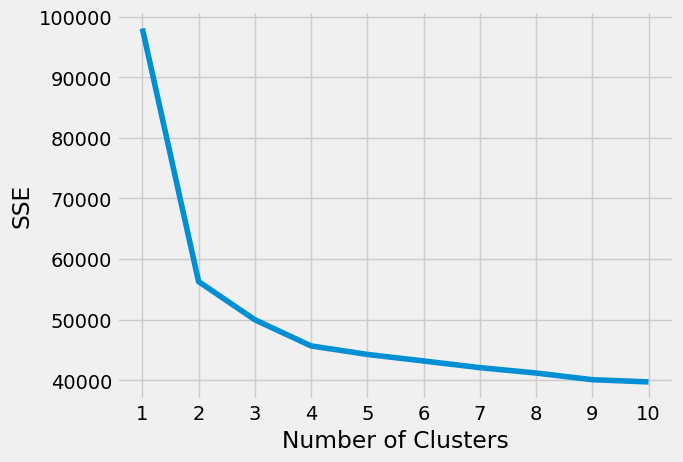

In [24]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [25]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)
kl.elbow

2

## Implementa la agrupación de datos utilizando K-means y muestra los resultados en una gráfica de componentes principales (PCA).

In [26]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_encoded)
    score = silhouette_score(df_encoded, kmeans.labels_)
    silhouette_coefficients.append(score)

silhouette_coefficients

[0.3672756608908605,
 0.25779062342011927,
 0.25124182779201504,
 0.19109458125687037,
 0.1898301809369227,
 0.18603652416600439,
 0.09990282389566466,
 0.1514693332384085,
 0.08703555306880528]

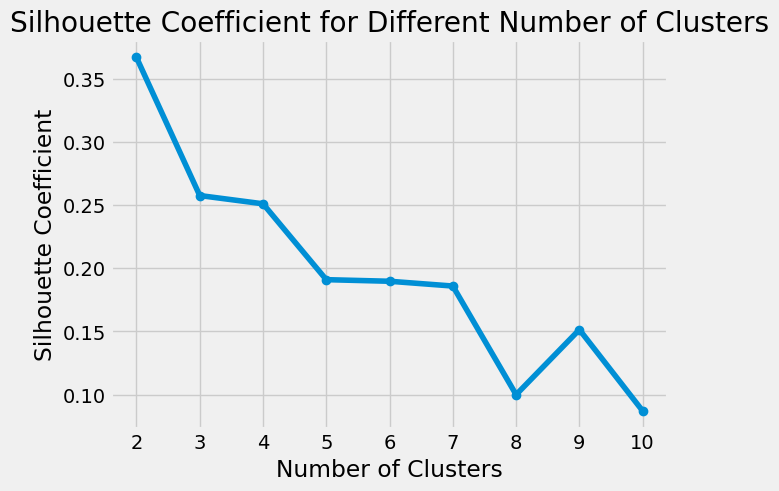

In [27]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients, marker='o')
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Coefficient for Different Number of Clusters")
plt.grid(True)
plt.show()

In [28]:
from sklearn.decomposition import PCA

# Aplicar PCA a df_encoded (DataFrame codificado)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_encoded)
principalDf = pd.DataFrame(data=principalComponents, columns=['pc_1', 'pc_2'])

# Variancia explicada por las dos componentes principales
explained_variance = pca.explained_variance_ratio_

# Mostrar la varianza explicada
print("Explained variance ratio:", explained_variance)
principalDf.head()

Explained variance ratio: [0.49032453 0.09219764]


,pc_1,pc_2
0,3.436306,1.184804
1,3.863242,-0.144998
2,-4.021866,0.090615
3,1.655258,-2.335238
4,4.267144,0.887389


In [29]:
from sklearn.cluster import KMeans

# Aplicar KMeans con 2 clusters
kmeans = KMeans(n_clusters=2, **kmeans_kwargs)
kmeans.fit(df_encoded)

# Obtener los centroides
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

# Mostrar los centroides
print("Centroids:\n", centroids)

Centroids:
 [[4.18213660e-01 5.46059545e-01 1.75481611e+01 ... 3.50262697e-04
  9.75781955e-19 9.21571847e-19]
 [1.59354513e-01 4.96722138e-01 1.53893091e+01 ... 7.58941521e-19
  1.51285930e-03 5.04286435e-04]]


In [30]:
# Crear un DataFrame con las etiquetas de clúster
df_target = pd.DataFrame(kmeans.labels_, columns=['target'])

# Concatenar el DataFrame de PCA
finalDf = pd.concat([principalDf, df_target, data['retention']], axis=1)
finalDf.head()

,pc_1,pc_2,target,retention
0,3.436306,1.184804,0.0,1.0
1,3.863242,-0.144998,0.0,1.0
2,-4.021866,0.090615,1.0,1.0
3,1.655258,-2.335238,0.0,1.0
4,4.267144,0.887389,0.0,0.0


In [31]:
# Agrupar por la columna 'target' y calcular la media
mean_df = finalDf.groupby(['target']).mean()

# Mostrar el DataFrame resultante
mean_df

,pc_1,pc_2,retention
target,,,
0.0,2.442441,-0.172688,0.919856
1.0,-3.516474,0.248625,0.923037


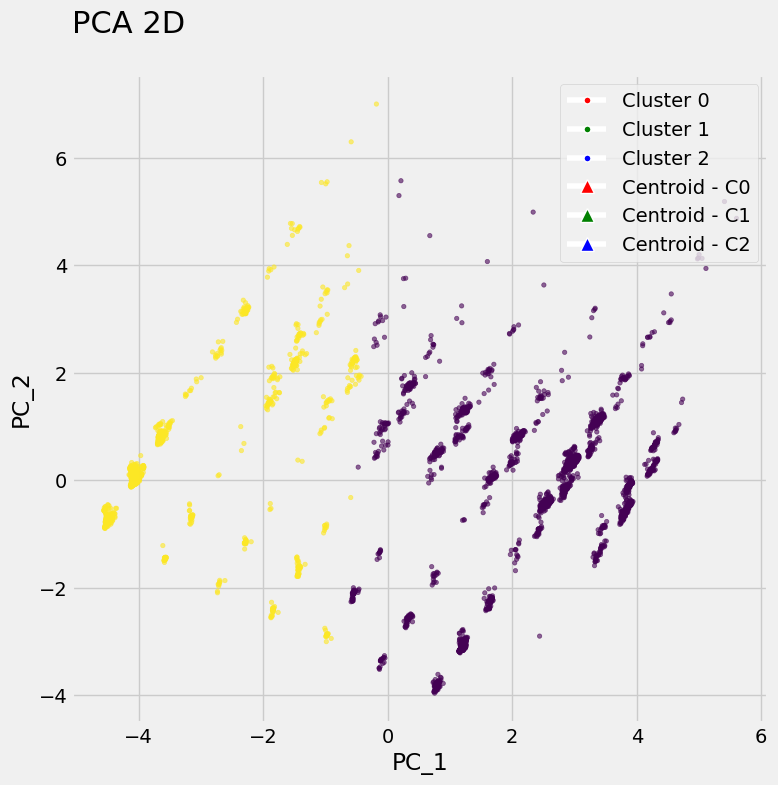

In [32]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Definir una lista de colores para los clusters (ajusta la cantidad según el número de clusters)
colors = ['red', 'green', 'blue']  # Asegúrate de tener suficientes colores para tus clusters

# Crear la figura y el eje
fig, ax = plt.subplots(1, figsize=(8, 8))

# Graficar los datos
plt.scatter(finalDf.pc_1, finalDf.pc_2, c=finalDf.target, alpha=0.6, s=10, cmap='viridis')

# Crear una lista de elementos de la leyenda para los centroides
cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i),
                    markerfacecolor=colors[i], markersize=10) for i in range(len(colors))]

# Elementos de la leyenda para los registros
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i),
                           markerfacecolor=colors[i], markersize=5) for i in range(len(colors))]
legend_elements.extend(cent_leg)

# Graficar la leyenda
plt.legend(handles=legend_elements, loc='upper right')

# Título y etiquetas
plt.title('PCA 2D\n', loc='left', fontsize=22)
plt.xlabel('PC_1')
plt.ylabel('PC_2')

# Mostrar el gráfico
plt.show()

C:\Users\dilan\AppData\Local\Temp\ipykernel_29232\3746551611.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  finalDf['c'].fillna(colors[0], inplace=True)  # Reemplaza NaN con un color predeterminado


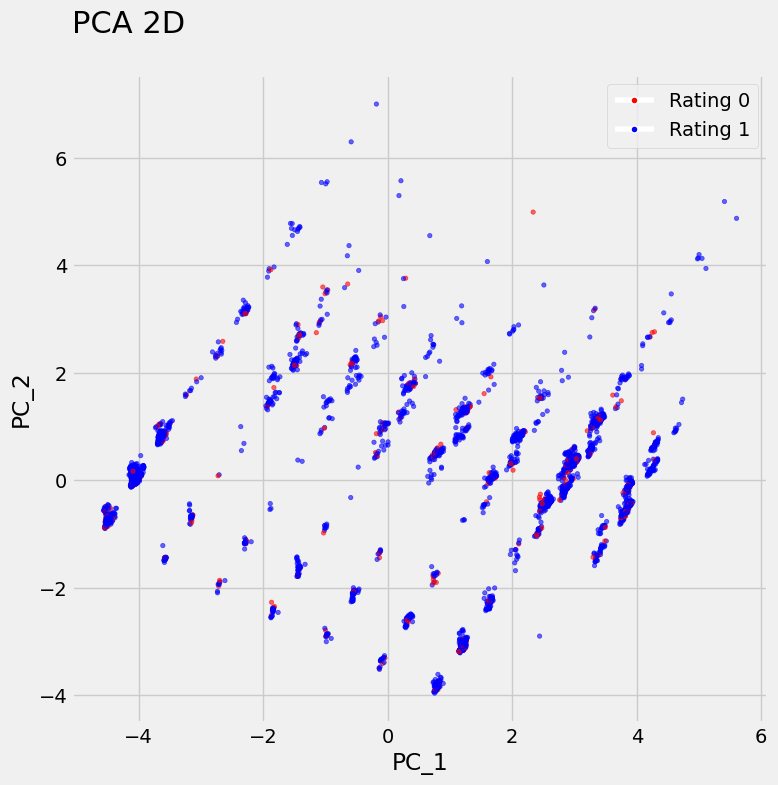

In [33]:
colors = ['r', 'b']

finalDf['c'] = finalDf.retention.map({0: colors[0], 1: colors[1]})

finalDf['c'].fillna(colors[0], inplace=True)  # Reemplaza NaN con un color predeterminado

# Crear la figura y el eje
fig, ax = plt.subplots(1, figsize=(8, 8))

# Graficar los datos
plt.scatter(finalDf.pc_1, finalDf.pc_2, c=finalDf.c, alpha=0.6, s=10)

# Crear una lista de elementos de la leyenda para los registros
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Rating {}'.format(i),
                           markerfacecolor=colors[i], markersize=5) for i in range(len(colors))]

plt.legend(handles=legend_elements, loc='upper right')
plt.title('PCA 2D\n', loc='left', fontsize=22)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.show()

## Preguntas individuales


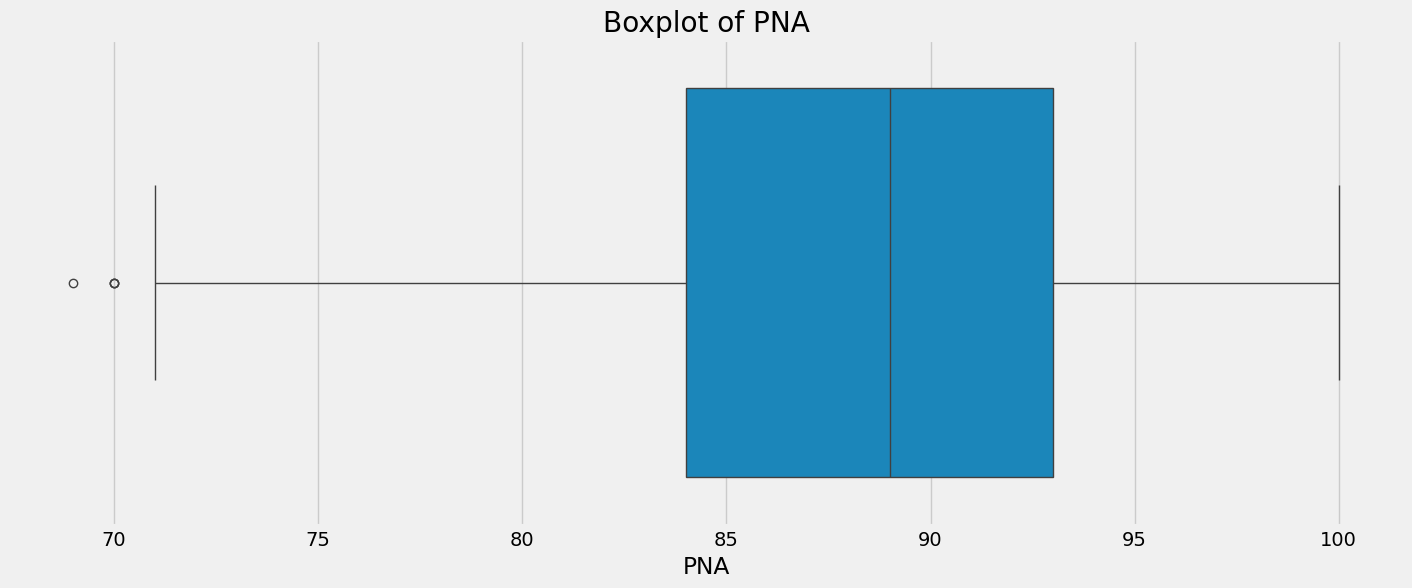

In [38]:
data['PNA'] = pd.to_numeric(data['PNA'], errors='coerce')  # Ensure 'PNA' is numeric
plt.figure(figsize=(16, 6))
sns.boxplot(x='PNA', data=data)
plt.title('Boxplot of PNA')
plt.xlabel('PNA')
plt.show()

**¿Por qué es necesario escalar los datos?**

La principal razón para hacerlo es para que el algoritmo de machine learning le sea más sencillo encontrar la lógica para separar los datos en grupos. Ya que no es lo mismo encontrar una logica entre un par de variables con rangos del 0 al 6 y del 0 al 1600. De esta forma se logrará una convergencia más rápida y asegura que todas las variables influyan equitativamente en la distancia euclidiana entre grupos.

---


**¿Qué información nos da la gráfica "Elbow plot"?**

De ella podemos extrar el número de grupos en los cuales se debe de agrupar los registros. Esto es debido a que desconocemos la cantidad de grupos en las que se debería de agrupar la información ya que hablamos de una tecnica de aprendizaje no supervisado y por lo cual deberíamos de encontrar una justificación numérica para la decisión de cuántos grupos serán los óptimos.

---


**¿Hay datos atípicos (outliers)?**

En su mayoría no, debido a que se utilizaron en su mayoria variables categoricas. Sin embargo en el caso de PNA, son mínimos la cantidad de outliers (2) en la cola izquierda pero al ser una variable que nos interesa conservarlos ya que pueden darnos una mejor la convergencia del modelo.

---


**¿Crees que tus resultados serían diferentes si eliminamos variables?**

Definitivamente sí. En este caso, al haber utilizado solo 20 variables la distancia entre los grupos no es suficientemente grande para distinguir rápidamente cada uno de ellos. Sin embargo, hay algunas variables que no tomamos y que podrían llegar a ser relevantes por la influencia y la naturaleza de las mismas. Es evidente que el preprocesamiento de los datos puede mejorar, aún así como primera iteración se encontró un acercamiento interesante.

---


**¿Cuántos clusters decidiste generar?**

En base a la gráfica "Elbow plot" se decidió generar 2 agrupaciones.